/var/folders/5s/ftwr_7g946qftss3qrkmfnlc0000gn/T/ipykernel_10290/3756589758.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df7['Date'] = pd.to_datetime(df7['Date'], errors='coerce')
/var/folders/5s/ftwr_7g946qftss3qrkmfnlc0000gn/T/ipykernel_10290/3756589758.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df7['Date'] = pd.to_datetime(df7['Date'], errors='coerce')
/var/folders/5s/ftwr_7g946qftss3qrkmfnlc0000gn/T/ipykernel_10290/3756589758.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df7['Date'] = pd.to_datetime(df7['Date'], errors='coerce')
/var/folders/5s/

<class 'pandas.core.frame.DataFrame'>
   Description   Amount
0     2C2*AMZN     2.99
1     ACE FRES    17.95
2     APPLE.CO     1.48
3     ATOME* M   107.76
4     BEDOK GA    14.00
5     BUS/MRT     89.13
6     CALTEX -     9.05
7     CCY CONV     0.01
8     DAISO JA    10.80
9     ENCIK TA     6.30
10    EVERGREE     4.90
11    FAIRPRIC    23.00
12    FRUITS V     2.00
13    GOJEK 90    55.50
14    L'OCCITA    42.00
15    LOVELY F    13.54
16    MCDONALD     7.75
17    MINMED C     5.00
18    MONEYSEN  1712.19
19    MR COCON     8.30
20    McDonald    13.20
21    NET*SUBW    21.70
22    NTUC FP     54.48
23    NTUC Fai   176.03
24    Prudenti  1515.00
25    SC* XDAD    76.49
26    SHAW THE    13.90
27    SINGTEL     50.36
28    SP Digit   104.65
29    SUBWAY -    27.50
30    Shaw The    33.00
31    THE SOUP    26.30
32    TOAST BO    12.90
33    UMISUSHI     6.95
34    UNITY BY    35.11
35    VEGGYYA      2.90
36    WATSON'S     6.10
37    fp*Food     19.19
38    www.anyw    10.00
<c

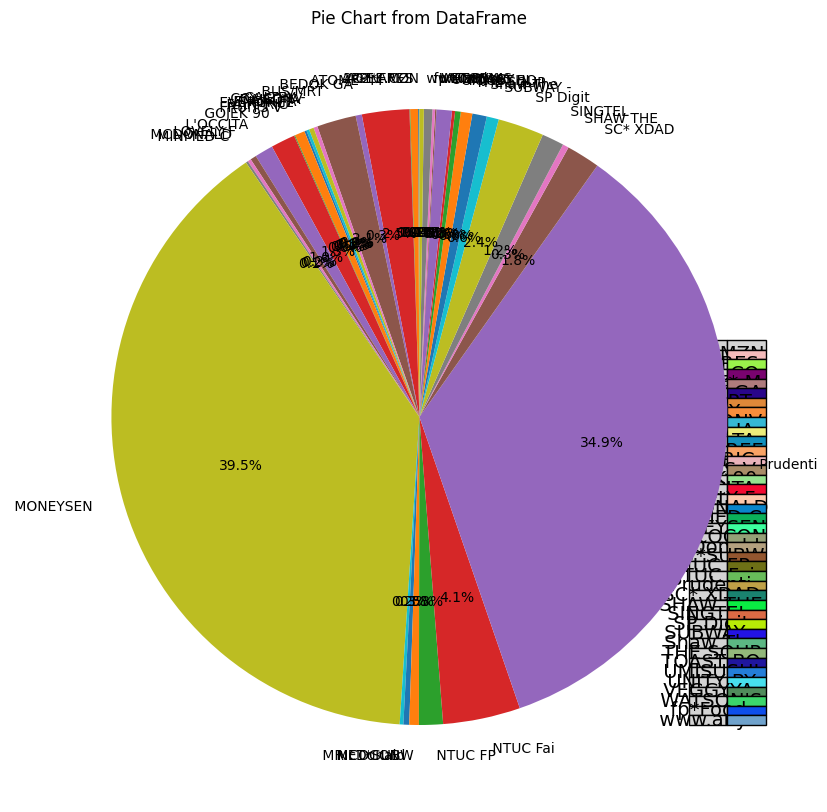

In [15]:
import tabula
import pandas as pd
import numpy as np
# from matplotlib import rc, pyplot as plt
import matplotlib.pyplot as plt
import random





# Read pdf into list of DataFrame
dfs = tabula.read_pdf("CardStatement_Sep2023.pdf", pages='all', encoding='utf-8', guess=False, lattice=False, stream=True)

appended_data = []

for df in dfs[1:]:
    df3 = df.drop_duplicates();
    df4 = df3.dropna(axis=1, how='all');
    df5 = df4.dropna(axis=0, how='all');

    df6 = df5.map(lambda x: x.strip() if isinstance(x, str) else x)

    df6.columns = [*df6.columns[:-1], 'Amount']


    df6['Date']=df5['Unnamed: 0'].str.slice(stop=6)+' 2023'
    df6['Description']=df5['Unnamed: 0'].str.slice(start=6)
    df7 = df6.filter(['Date','Description','Amount'])

    df7['Date'] = pd.to_datetime(df7['Date'], errors='coerce')
    df7 = df7.dropna(subset=['Date'])
    df7['Amount'] = df7['Amount'].astype(str)
    df7['Amount'] = df7['Amount'].str.replace(r'[^0-9.]', '', regex=True)
    df7['Amount'] = pd.to_numeric(df7['Amount'], errors='coerce')

    appended_data.append(df7)
 
appended_data = pd.concat(appended_data).reset_index(drop=True)
appended_data = appended_data.groupby(appended_data['Description'].str[:9])['Amount'].sum().reset_index()



appended_data = appended_data.drop(appended_data.index[appended_data['Amount'] == 1487.73])
# appended_data.drop(appended_data[appended_data['Description'].str == "MONEYSEN"].index)

result_df = pd.DataFrame(appended_data, columns=['Description', 'Amount'])
print(type(result_df))
print(result_df)

# appended_data = appended_data.sort_values('Amount')
print(type(appended_data['Description']))

# report generation starts here 

labels = result_df['Description']
sizes = result_df['Amount']

plt.figure(figsize=(14, 10))


plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Create a custom legend with labels and manually specified colors
legend_labels = labels
legend_colors = [(random.random(), random.random(), random.random(), 1) for _ in range(39)]


# Create a legend table with one column for labels and one column for colors
legend_table_data = [[label, ''] for label in legend_labels]
legend_table = plt.table(cellText=legend_table_data,
                         loc='center',
                         cellLoc='center',
                         colColours=['lightgray', 'lightgray'],
                         cellColours=[['lightgray', color] for color in legend_colors],
                         bbox=[0.85, 0.1, 0.1, 0.5])

# Customize the appearance of the legend table
legend_table.auto_set_font_size(False)
legend_table.set_fontsize(14)
legend_table.scale(1, 2)

# Remove axis labels and ticks
plt.axis('off')

 

plt.title('Expenses')
plt.show()


 